In [ ]:
#####
#load data
#agumente data
#shuffle data
#save data in x,y


import numpy as np
import os
import cv2
from keras.preprocessing.image import ImageDataGenerator

data_path='/content/drive/MyDrive/server_2/dataset'
class_list=['Chickenpox','Measles','Monkeypox','Normal']
server_path = '/content/drive/MyDrive/server'


# Define data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate augmented images for each class
for class_name in class_list:
    class_path = os.path.join(data_path, class_name)
    class_generator = datagen.flow_from_directory(
        class_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode=None,
        shuffle=True
    )
    i = 0
    limit = 1000
    while i < limit:
        for batch in class_generator:
            augmented_images, _ = datagen.flow(batch, np.zeros(batch.shape[0]), batch_size=32).next()
            for img in augmented_images:
                filename = '{}_augmented_{}.jpg'.format(class_name, i)
                filepath = os.path.join(server_path,class_name, filename)
                cv2.imwrite(filepath, cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR))
                i += 1
                if i >= limit:
                    break
            if i >= limit:
                break


Found 107 images belonging to 1 classes.
Found 91 images belonging to 1 classes.
Found 279 images belonging to 1 classes.
Found 293 images belonging to 1 classes.


In [ ]:

import os
import gc
import numpy as np
import keras.utils as image
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Flatten
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf


#4 classes
train_dir ='/content/drive/MyDrive/server'

# Define the image size and number of channels
img_width, img_height, img_channels = 224, 224, 3

# Define a function to load and preprocess an image given its file path
def load_preprocess_image(file_path):
    img = image.load_img(file_path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = img / 255.0  # rescale the pixel values to [0, 1]
    return img


def classcode(x):
  if x=='Monkeypox_augmented' or x=='Monkeypox' or x=='Monkey Pox':
    return 1
  elif x=='Measles':
    return 2
  elif x=='Chickenpox':
    return 3
  return 0

# Load and preprocess the train images
train_images = []
train_labels = []
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    for file_name in os.listdir(class_path):
        file_path = os.path.join(class_path, file_name)
        img = load_preprocess_image(file_path)
        train_images.append(img)
        train_labels.append(classcode(class_name))
train_images = np.array(train_images)
train_labels = np.array(train_labels)




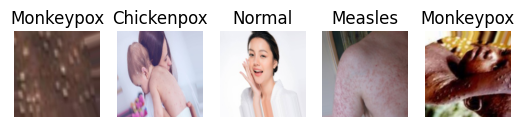

In [ ]:
import matplotlib.pyplot as plt


def classdecode(x):
  if x==1:
    return 'Monkeypox'
  elif x==2:
    return 'Measles'
  elif x==3:
    return 'Chickenpox'
  return 'Normal'

t=[2001,28,1002,3002,2005]

for i in range(5):
    plt.subplot(1, 5, i+1)  # Create a subplot for each image
    plt.imshow(train_images[t[i]])  # Display the image
    plt.title(classdecode(train_labels[t[i]]))
    plt.axis('off')  # Hide the axes labels


plt.show()

In [ ]:
print(train_labels)

[2 0 2 ... 2 3 0]
Index of 5 consecutive changing values: None


In [ ]:
import numpy as np

# Shuffle train data
idx = np.random.permutation(len(train_images))
train_images = train_images[idx]
train_labels = train_labels[idx]

In [ ]:
np.save('/content/drive/MyDrive/server_2/fast_data/x.npy',train_images)
np.save('/content/drive/MyDrive/server_2/fast_data/y.npy',train_labels)

In [ ]:
from sklearn.model_selection import train_test_split
x=np.load('/content/drive/MyDrive/server_2/fast_data/x.npy')
y=np.load('/content/drive/MyDrive/server_2/fast_data/y.npy')

# Assuming train_images and train_labels are already defined
X_train, X_val, y_train, y_val = train_test_split(x,y, test_size=0.2, random_state=42)

# Print the shapes of the new sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)


X_train shape: (3200, 224, 224, 3)
y_train shape: (3200,)
X_val shape: (800, 224, 224, 3)
y_val shape: (800,)


In [ ]:
import numpy as np

# Get the unique labels and their counts in train_labels
unique_labels, counts = np.unique(train_labels, return_counts=True)

# Display the number of classes
num_classes = len(unique_labels)
print("Number of classes:", num_classes)

# Display the count of each class
for label, count in zip(unique_labels, counts):
    print("Class {} has {} samples".format(label, count))

Number of classes: 4
Class 0 has 1000 samples
Class 1 has 1000 samples
Class 2 has 1000 samples
Class 3 has 1000 samples
